# Tensorflow 2.0 Tutorial

## Basic Tensorflow Operations

In [1]:
import tensorflow as tf
print("tensorflow version:",tf.__version__)

tensorflow version: 2.4.1


In [2]:
# Create a constant tensor A
A = tf.constant([[1,2],
                  [3,4]])
A

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4]], dtype=int32)>

In [3]:
# Create a Variable tensor B
B = tf.Variable([[5,6],
                 [7,8]])
B

<tf.Variable 'Variable:0' shape=(2, 2) dtype=int32, numpy=
array([[5, 6],
       [7, 8]], dtype=int32)>

In [4]:
# Concatenate Two Tensor along the sencond dimension
C = tf.concat([A,B], axis=1)
C

<tf.Tensor: shape=(2, 4), dtype=int32, numpy=
array([[1, 2, 5, 6],
       [3, 4, 7, 8]], dtype=int32)>

In [5]:
# Concatenate Two Tensor along the first dimension
D = tf.concat([A,B], axis=0)
D

<tf.Tensor: shape=(4, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]], dtype=int32)>

In [6]:
# Creates a tensor with all elements set to zero.
E = tf.zeros(shape=[4,3],dtype=tf.float16)
E

<tf.Tensor: shape=(4, 3), dtype=float16, numpy=
array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float16)>

In [7]:
# Creates a tensor with all elements set to one.
F = tf.ones(shape=[4,3],dtype=tf.int32)
F

<tf.Tensor: shape=(4, 3), dtype=int32, numpy=
array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=int32)>

In [9]:
# Creates a tensor with elements sampled from a uniform distribution.
G = tf.random.uniform(shape=[2,6])
G

<tf.Tensor: shape=(2, 6), dtype=float32, numpy=
array([[0.81725085, 0.9507818 , 0.6142397 , 0.7110319 , 0.41889906,
        0.92758274],
       [0.6410419 , 0.56665635, 0.97293687, 0.35591698, 0.4672836 ,
        0.68865407]], dtype=float32)>

In [10]:
# Reshape a tensor
H = tf.reshape(G,shape=[3,4])
H

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0.81725085, 0.9507818 , 0.6142397 , 0.7110319 ],
       [0.41889906, 0.92758274, 0.6410419 , 0.56665635],
       [0.97293687, 0.35591698, 0.4672836 , 0.68865407]], dtype=float32)>

In [11]:
# Typecast a tensor
I = H * 100.0
print(I)
J = tf.cast(I, dtype=tf.int32)
print(J)

tf.Tensor(
[[81.72508  95.078186 61.42397  71.103195]
 [41.889908 92.75827  64.10419  56.665634]
 [97.293686 35.591698 46.72836  68.86541 ]], shape=(3, 4), dtype=float32)
tf.Tensor(
[[81 95 61 71]
 [41 92 64 56]
 [97 35 46 68]], shape=(3, 4), dtype=int32)


In [13]:
# Matrix multiply
A = tf.constant([[1,2],
                  [3,4]])
x = tf.constant([[2],
                 [3]])
M = tf.matmul(A, x)
M

<tf.Tensor: shape=(2, 1), dtype=int32, numpy=
array([[ 8],
       [18]], dtype=int32)>

In [14]:
# Element-wise math operation
B = tf.constant([[-1,-2],
                 [-3,-4]])
N = tf.multiply(A,B)
N

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ -1,  -4],
       [ -9, -16]], dtype=int32)>

## Training Convolutional Neural Network (CNN) to classify images

This tutorial is based on https://www.tensorflow.org/tutorials

Please check out the tutorial for more details!

### CIFAR10 Image Classification

In [15]:
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras import layers
from tensorflow.keras import models
import matplotlib.pyplot as plt

In [16]:
#Download and prepare the CIFAR10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [17]:
print("training data")
print(train_images.shape)
print(train_labels.shape)

print("test data")
print(test_images.shape)
print(test_labels.shape)

training data
(50000, 32, 32, 3)
(50000, 1)
test data
(10000, 32, 32, 3)
(10000, 1)


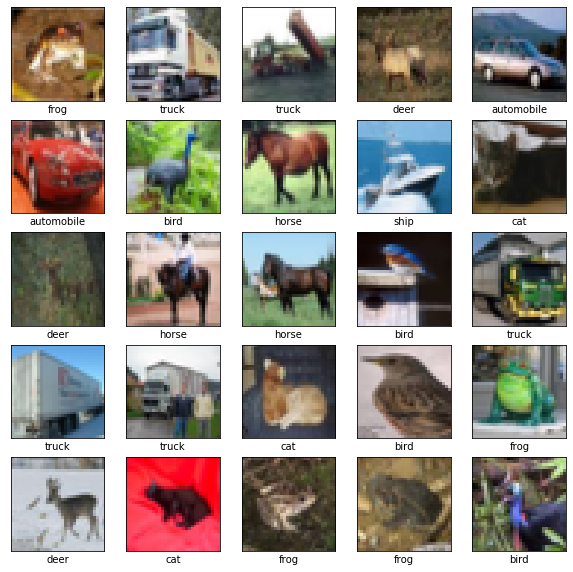

In [18]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

#### Using the Keras Sequential API

We will first build the tf.keras.Sequential model by stacking layers.

In [19]:
# Create the model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [20]:
# display the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [22]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.7991 - accuracy: 0.3278 - val_loss: 1.3003 - val_accuracy: 0.5280
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.2249 - accuracy: 0.5648 - val_loss: 1.1149 - val_accuracy: 0.6040
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0228 - accuracy: 0.6396 - val_loss: 0.9958 - val_accuracy: 0.6545
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8959 - accuracy: 0.6880 - val_loss: 0.9301 - val_accuracy: 0.6778
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8297 - accuracy: 0.7135 - val_loss: 0.9457 - val_accuracy: 0.6718
Epoch 6/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7542 - accuracy: 0.7369 - val_loss: 0.9114 - val_accuracy: 0.6898
Epoch 7/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6965 - accuracy: 0.7599 - val_loss: 0.8594 - val_ac

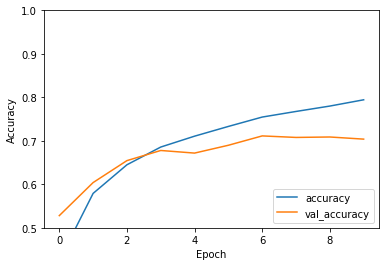

In [24]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [25]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 0.8868 - accuracy: 0.7039


### Save and Load Models

Save checkpoints during training

In [26]:
# Define a simple sequential model
def create_model():
    model = tf.keras.models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10),
        ])
    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    return model

# Create a basic model instance
model_A = create_model()

# Display the model's architecture
model_A.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)              

In [27]:
import os
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [28]:
# Train the model with the new callback
model_A.fit(train_images, 
          train_labels,  
          epochs=10,
          validation_data=(test_images, test_labels),
          callbacks=[cp_callback])  # Pass callback to training

Epoch 1/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.7687 - accuracy: 0.3399 - val_loss: 1.2969 - val_accuracy: 0.5450

Epoch 00001: saving model to training_1/cp.ckpt
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.2039 - accuracy: 0.5759 - val_loss: 1.0743 - val_accuracy: 0.6227

Epoch 00002: saving model to training_1/cp.ckpt
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0306 - accuracy: 0.6377 - val_loss: 1.0011 - val_accuracy: 0.6482

Epoch 00003: saving model to training_1/cp.ckpt
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9211 - accuracy: 0.6794 - val_loss: 0.9468 - val_accuracy: 0.6630

Epoch 00004: saving model to training_1/cp.ckpt
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8305 - accuracy: 0.7130 - val_loss: 1.0070 - val_accuracy: 0.6546

Epoch 00005: saving model to training_1/cp.ckpt
Epoch 6/10
1563/1563 [========

This creates a single collection of TensorFlow checkpoint files that are updated at the end of each epoch:

In [30]:
os.listdir(checkpoint_dir)

['checkpoint', 'cp.ckpt.data-00000-of-00001', 'cp.ckpt.index']

In [31]:
# Create a basic model instance
model_B = create_model()

# Evaluate the model
loss, acc = model_B.evaluate(test_images, test_labels, verbose=2)
print("Untrained model, accuracy: {:5.2f}%".format(100 * acc))

313/313 - 1s - loss: 2.3044 - accuracy: 0.1065
Untrained model, accuracy: 10.65%


In [32]:
# Loads the weights
model_B.load_weights(checkpoint_path)

# Re-evaluate the model
loss, acc = model_B.evaluate(test_images, test_labels, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

313/313 - 1s - loss: 0.8922 - accuracy: 0.7056
Restored model, accuracy: 70.56%


### Load Images

In [33]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

This tutorial uses a dataset of several thousand photos of flowers. The flowers dataset contains 5 sub-directories, one per class:

flowers_photos/
  daisy/
  dandelion/
  roses/
  sunflowers/
  tulips/

In [34]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url, 
                                   fname='flower_photos', 
                                   untar=True)
data_dir = pathlib.Path(data_dir)

In [35]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


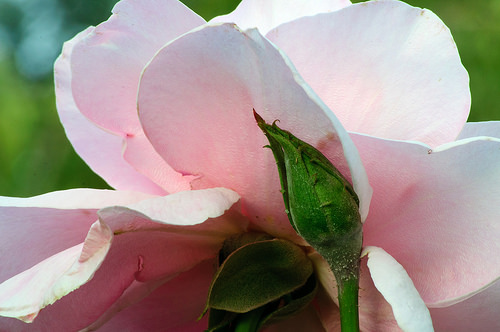

In [36]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

#### Create a dataset

In [37]:
batch_size = 32
img_height = 180
img_width = 180

In [38]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [39]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [40]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [41]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [42]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [43]:
num_classes = 5

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [44]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)

Epoch 1/3
92/92 [==============================] - 26s 276ms/step - loss: 1.4511 - accuracy: 0.3962 - val_loss: 1.1298 - val_accuracy: 0.5722
Epoch 2/3
92/92 [==============================] - 24s 259ms/step - loss: 1.0259 - accuracy: 0.6089 - val_loss: 1.0213 - val_accuracy: 0.6144
Epoch 3/3
92/92 [==============================] - 24s 260ms/step - loss: 0.8548 - accuracy: 0.6832 - val_loss: 0.9838 - val_accuracy: 0.6213
